<a href="https://colab.research.google.com/github/JoseMAGG/Modelos-2--Energy-Efficiency/blob/main/Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importaciones

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score


Se carga la base de datos normalizada


In [ ]:
energy_data_frame = pd.read_csv("BD_10_Reg(Normalizado).csv")
energy_data_frame.drop(columns=['Index'])
energy_data_frame

,Index,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load
0,0,1.000000,0.000000,0.285714,0.000000,1.0,2,0.0,0,15.55
1,1,1.000000,0.000000,0.285714,0.000000,1.0,3,0.0,0,15.55
2,2,1.000000,0.000000,0.285714,0.000000,1.0,4,0.0,0,15.55
3,3,1.000000,0.000000,0.285714,0.000000,1.0,5,0.0,0,15.55
4,4,0.777778,0.166667,0.428571,0.111111,1.0,2,0.0,0,20.84
...,...,...,...,...,...,...,...,...,...,...
763,763,0.055556,0.916667,0.571429,1.000000,0.0,5,0.4,5,17.88
764,764,0.000000,1.000000,0.714286,1.000000,0.0,2,0.4,5,16.54
765,765,0.000000,1.000000,0.714286,1.000000,0.0,3,0.4,5,16.44
766,766,0.000000,1.000000,0.714286,1.000000,0.0,4,0.4,5,16.48


Se asigna 'x' con las variables de entrada y 'y' con la variable de salida

In [ ]:
x_columns = ["Relative_Compactness","Surface_Area","Wall_Area","Roof_Area","Overall_Height","Orientation","Glazing_Area","Glazing_Area_Distribution"]
x = energy_data_frame[x_columns]
y = energy_data_frame['Heating_Load']
print(x,y)

     Relative_Compactness  Surface_Area  Wall_Area  Roof_Area  Overall_Height  \
0                1.000000      0.000000   0.285714   0.000000             1.0   
1                1.000000      0.000000   0.285714   0.000000             1.0   
2                1.000000      0.000000   0.285714   0.000000             1.0   
3                1.000000      0.000000   0.285714   0.000000             1.0   
4                0.777778      0.166667   0.428571   0.111111             1.0   
..                    ...           ...        ...        ...             ...   
763              0.055556      0.916667   0.571429   1.000000             0.0   
764              0.000000      1.000000   0.714286   1.000000             0.0   
765              0.000000      1.000000   0.714286   1.000000             0.0   
766              0.000000      1.000000   0.714286   1.000000             0.0   
767              0.000000      1.000000   0.714286   1.000000             0.0   

     Orientation  Glazing_A

#División en datos de entrenamiento y de prueba

Entrenamiento: 80%
Prueba:        20%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

KNN
Ventana de parzen
MultipleLinearRegression
Naive-Bayes Regressor

# MultipleLinearRegressor

In [ ]:
linear_regressor_model = LinearRegression().fit(X_train,y_train)


In [ ]:
print("Coeficientes",linear_regressor_model.coef_)
print("Intercepto",linear_regressor_model.intercept_)

Coeficientes [-22.27440753  -8.53153116   1.10909178 -12.23800182  14.43284222
  -0.03243911  20.14319248   0.21110283]
Intercepto 30.214577639737307


In [ ]:
predictions_LR = linear_regressor_model.predict(X_test)

In [ ]:
def plot_predictions_vs_y_test(predictions, y_test, plot_title):
  x_values = y_test  # Cambia 'Surface_Area' por la columna que quieras graficar
  # Calcular los valores correspondientes y usando la ecuación de la línea
  y_values = predictions
  # Graficar los puntos de datos
  plt.scatter(x_values, y_values)
  # Graficar la línea de regresión
  x_line = np.linspace(0,50, 51)
  plt.plot(x_line, x_line, color='red')

  plt.xlabel('Real Y')
  plt.ylabel('Predicted Y')
  plt.title(plot_title)
  plt.legend()
  plt.show()

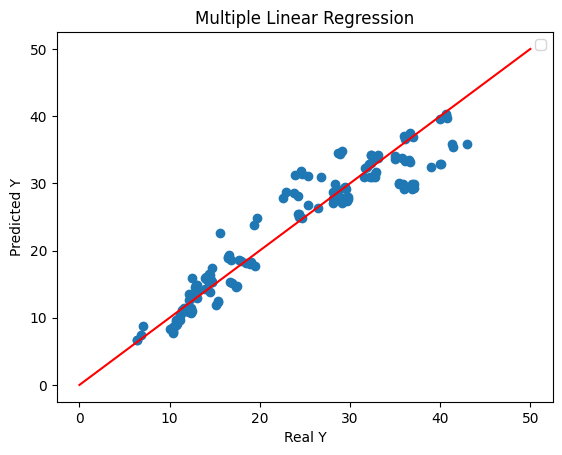

In [ ]:
plot_predictions_vs_y_test(predictions=predictions_LR, y_test=y_test, plot_title='Multiple Linear Regression')

#K Neighbors Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
# KNN
def knn_regressor(X_train, y_train, n_neighbors=5):
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    return model
modelKNN = knn_regressor(X_train, y_train)

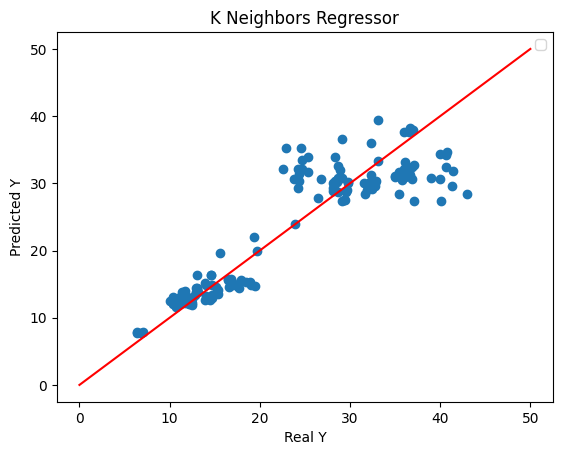

In [ ]:
predictions_KNN = modelKNN.predict(X_test)
plot_predictions_vs_y_test(predictions=predictions_KNN, y_test=y_test, plot_title='K Neighbors Regressor')

#PolynomialRegreesion

In [ ]:
poly_regression = PolynomialFeatures(degree=2)

In [ ]:
X_train_poly = poly_regression.fit_transform(X_train)
X_test_poly = poly_regression.fit_transform(X_test)

In [ ]:
poly_regression = LinearRegression()

In [ ]:
poly_regression.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
predictions_PR = poly_regression.predict(X_test_poly)

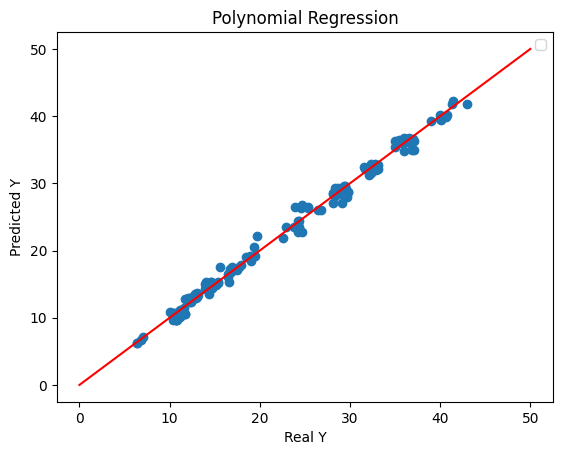

In [ ]:
plot_predictions_vs_y_test(predictions_PR, y_test, 'Polynomial Regression')

#Decision Trees

In [ ]:
decision_tree = DecisionTreeRegressor(max_depth=5)

In [ ]:
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
predictions_DT =  decision_tree.predict(X_test)

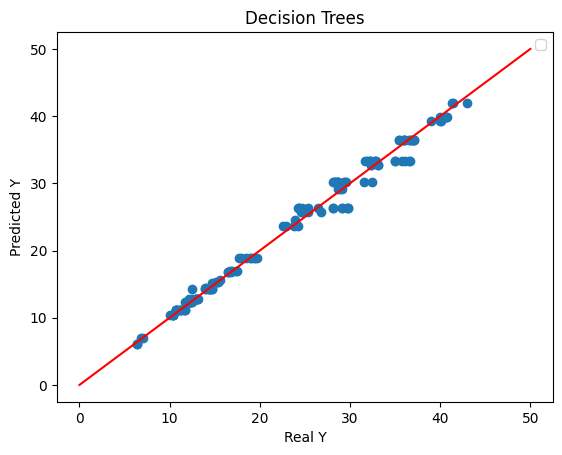

In [ ]:
plot_predictions_vs_y_test(predictions_DT, y_test, 'Decision Trees')

# Comparación gráfica de los modelos

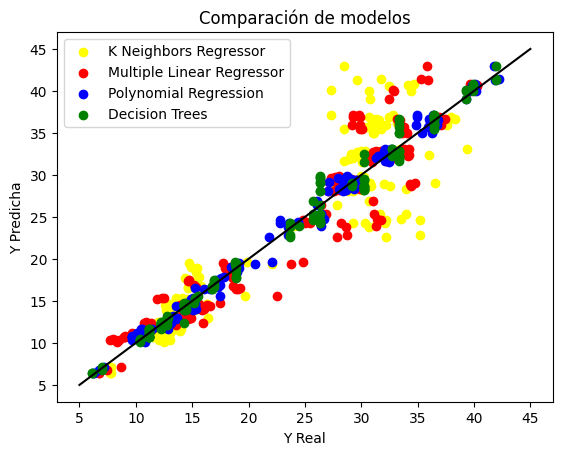

In [ ]:
plt.scatter(predictions_KNN, y_test, color='yellow')
plt.scatter(predictions_LR, y_test, color='red')
plt.scatter(predictions_PR, y_test, color='blue')
plt.scatter(predictions_DT, y_test, color='green')

# Graficar la línea de regresión
x_line = np.linspace(5,45, 41)
plt.plot(x_line, x_line, color='black')


plt.xlabel('Y Real')
plt.ylabel('Y Predicha')
plt.legend(['K Neighbors Regressor','Multiple Linear Regressor', 'Polynomial Regression', 'Decision Trees'])
plt.title('Comparación de modelos')
plt.show()

#Evaluación del Error

In [ ]:
from sklearn.metrics import mean_squared_error

def calcular_mse(y_true, y_pred):
  mse = mean_squared_error(y_true, y_pred)
  return mse

In [ ]:
modelos = {
    'Multiple_Linear_Regressor': (linear_regressor_model, predictions_LR, X_train, X_test),
    'K_Neighbors_Regressor': (modelKNN, predictions_KNN, X_train, X_test),
    'Polynomial_Regresion': (poly_regression, predictions_PR, X_train_poly, X_test_poly),
    'Decision_Trees': (decision_tree, predictions_DT, X_train, X_test),
}

In [ ]:
def generar_tabla_de_metricas(diccionario_modelos, valores_reales):
    resultados = {'Modelo': [], 'MSE': [], 'R^2 Entrenamiento': [], 'R^2 Prueba': []}

    for nombre_modelo, modelo, in diccionario_modelos.items():
        # Calcula el error cuadrático medio y el score utilizando las funciones proporcionadas
        error_cuadratico_medio = calcular_mse(valores_reales, modelo[1])
        score = modelo[0].score(modelo[2], y_train)
        score_test = modelo[0].score(modelo[3], y_test)
        # Guarda los resultados en el diccionario
        resultados['Modelo'].append(nombre_modelo)
        resultados['MSE'].append(error_cuadratico_medio)
        resultados['R^2 Entrenamiento'].append(score)
        resultados['R^2 Prueba'].append(score_test)

    # Crea un DataFrame de pandas a partir de los resultados
    tabla_resultados = pd.DataFrame(resultados)

    return tabla_resultados


In [ ]:
generar_tabla_de_metricas(modelos, y_test)

,Modelo,MSE,R^2 Entrenamiento,R^2 Prueba
0,Multiple_Linear_Regressor,9.153208,0.917065,0.912185
1,K_Neighbors_Regressor,17.683850,0.903671,0.830342
2,Polynomial_Regresion,0.643139,0.995174,0.993830
3,Decision_Trees,1.222934,0.990877,0.988267
